[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mohamed-Mehira/AI-computer-vision/blob/master/Tensorflow/CNN_cifar10.ipynb)

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
from math import *

E:\Softwares\anaconda3\envs\tf\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape)  # (50000, 32, 32, 3)
print(train_labels.shape)  # (50000, 1)

train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(50000, 32, 32, 3)
(50000, 1)


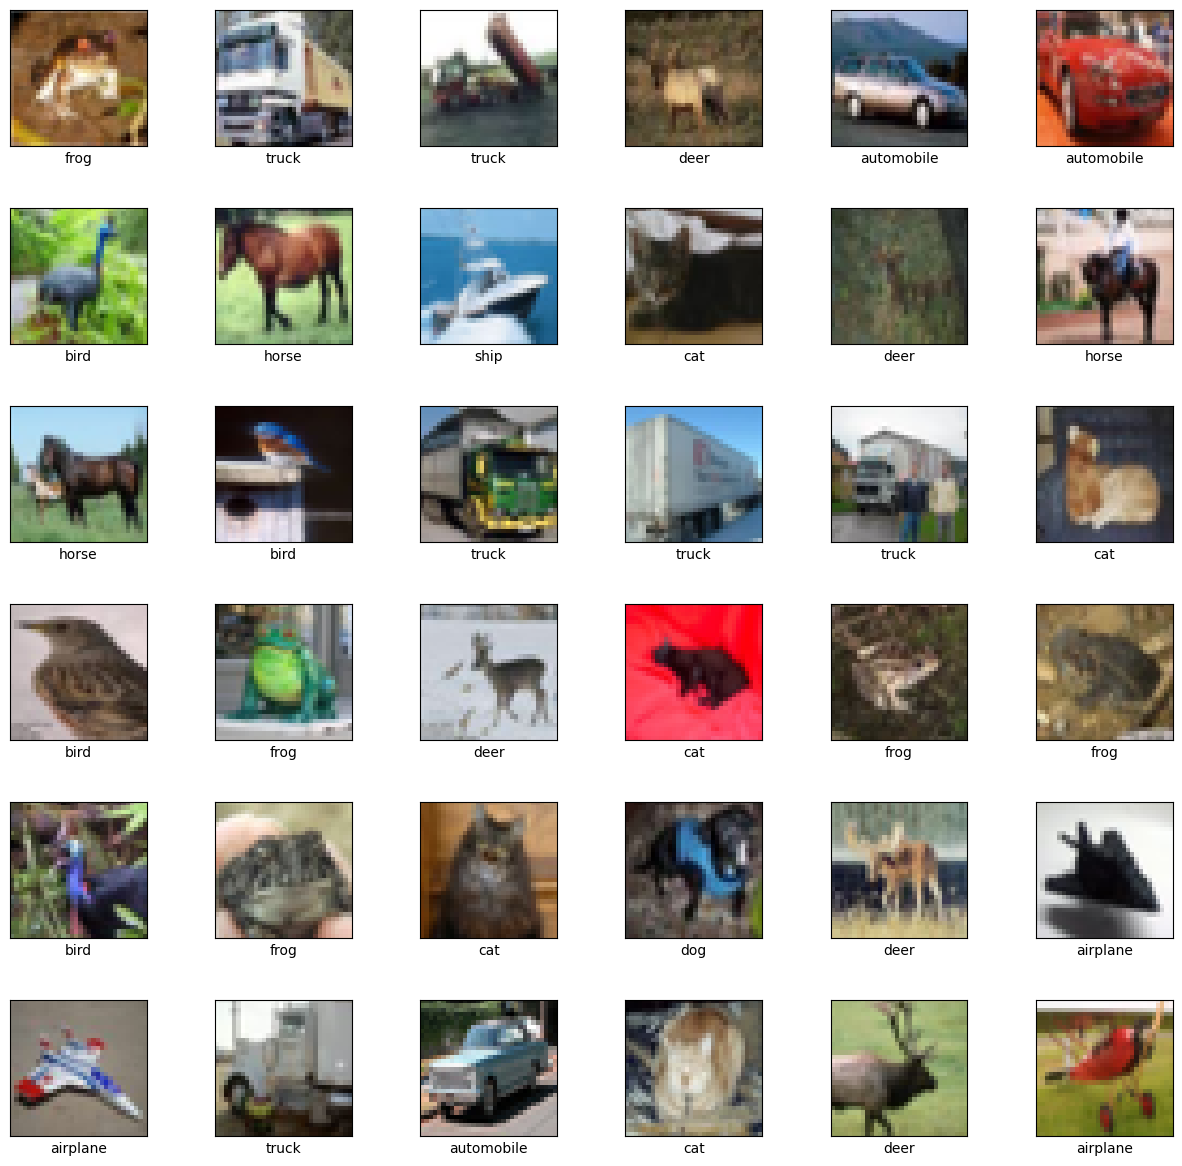

In [3]:
### visuallization

def show(images, labels, pred_labels=None, img_num=16):
    plt.figure(figsize=(15, 15))
    for i in range(img_num):
        x = ceil(sqrt(img_num))
        plt.subplot(x, x, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        # CIFAR labels are arrays
        # which is why we need the extra index
        label = class_names[labels[i][0]]
        if pred_labels is not None:
            label += "\nPrediction: " + class_names[pred_labels[i]]
        plt.xlabel(label)
        plt.subplots_adjust(wspace=0.5)
    plt.show()
    
show(train_images, train_labels, img_num=36)

In [4]:
### model

model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, 3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [5]:
### training

loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = keras.optimizers.Adam(learning_rate=0.002)
metrics = ["accuracy"]

model.compile(optimizer, loss, metrics)

history = model.fit(train_images, train_labels, epochs=25, batch_size=64, verbose=2)

model.evaluate(test_images, test_labels, batch_size=64, verbose=2)

Epoch 1/25
782/782 - 7s - loss: 1.5683 - accuracy: 0.4199 - 7s/epoch - 8ms/step
Epoch 2/25
782/782 - 3s - loss: 1.1709 - accuracy: 0.5842 - 3s/epoch - 4ms/step
Epoch 3/25
782/782 - 3s - loss: 1.0164 - accuracy: 0.6412 - 3s/epoch - 4ms/step
Epoch 4/25
782/782 - 4s - loss: 0.9113 - accuracy: 0.6813 - 4s/epoch - 5ms/step
Epoch 5/25
782/782 - 4s - loss: 0.8326 - accuracy: 0.7099 - 4s/epoch - 5ms/step
Epoch 6/25
782/782 - 4s - loss: 0.7753 - accuracy: 0.7283 - 4s/epoch - 5ms/step
Epoch 7/25
782/782 - 4s - loss: 0.7222 - accuracy: 0.7463 - 4s/epoch - 5ms/step
Epoch 8/25
782/782 - 3s - loss: 0.6734 - accuracy: 0.7630 - 3s/epoch - 4ms/step
Epoch 9/25
782/782 - 3s - loss: 0.6394 - accuracy: 0.7751 - 3s/epoch - 4ms/step
Epoch 10/25
782/782 - 3s - loss: 0.5972 - accuracy: 0.7890 - 3s/epoch - 4ms/step
Epoch 11/25
782/782 - 3s - loss: 0.5639 - accuracy: 0.8009 - 3s/epoch - 4ms/step
Epoch 12/25
782/782 - 3s - loss: 0.5382 - accuracy: 0.8094 - 3s/epoch - 4ms/step
Epoch 13/25
782/782 - 3s - loss: 0.51

[1.3512070178985596, 0.6884999871253967]

Text(0.5, 1.0, 'Loss Curve')

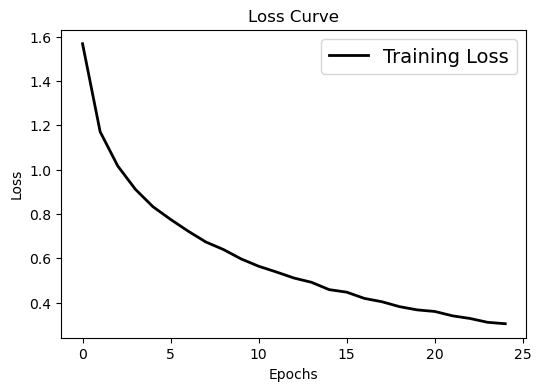

In [6]:
### Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.legend(['Training Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curve', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curve')

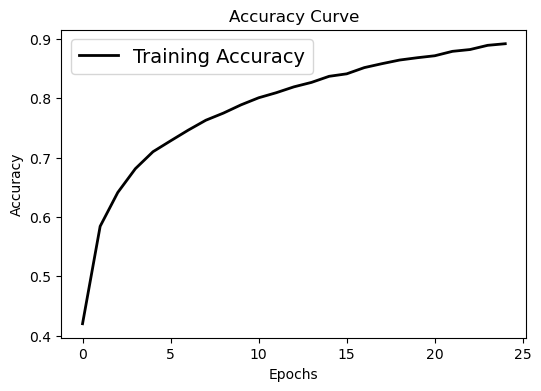

In [7]:
### Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.legend(['Training Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curve', fontsize=12)

313/313 [==============================] - 1s 2ms/step


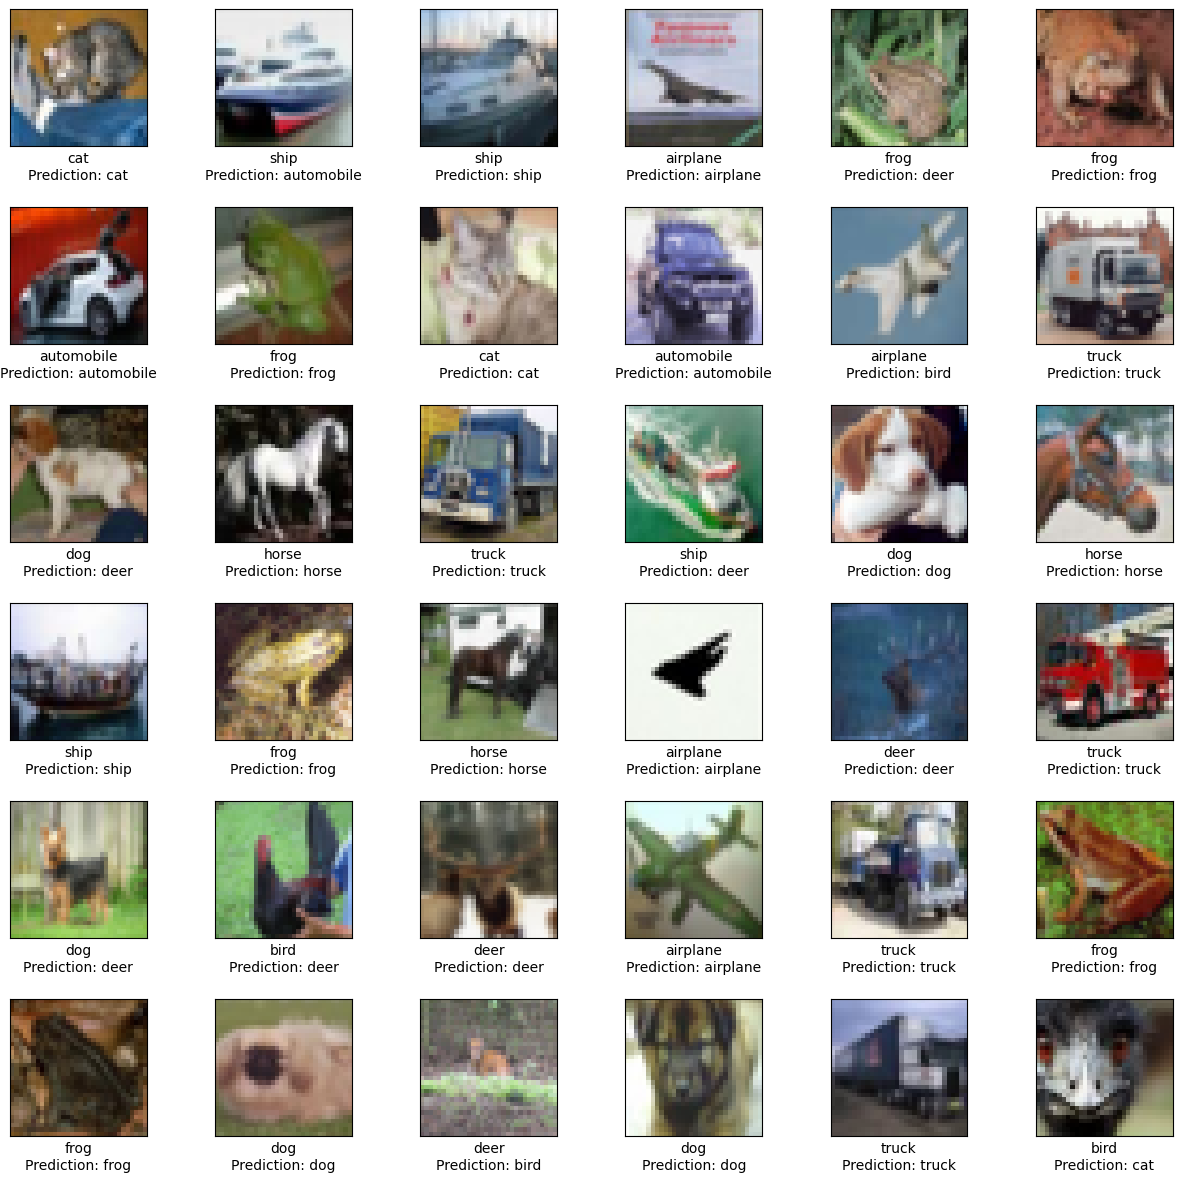

In [8]:
### testing

predictions = model.predict(test_images)

img_num = 36
pred_labels = np.argmax(predictions, axis=1)
show(test_images, test_labels, pred_labels, img_num)